In [ ]:
# Packages installation

!pip install pandas
!pip install numpy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
# Imports

import io
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt

from statsmodels.formula.api import ols
from google.colab import files

uploaded = files.upload()

Saving metacritic_games_cleaned.csv to metacritic_games_cleaned.csv


In [ ]:
df = pd.read_csv(io.BytesIO(uploaded['metacritic_games_cleaned.csv']))
df.head()

,game,platform,developer,genre,rating,release_date,metascore,user_score
0,Portal 2,PC,Valve Software,Action,E10+,"Apr 18, 2011",95,90
1,The Elder Scrolls V: Skyrim,PC,Bethesda Game Studios,Role-Playing,M,"Nov 10, 2011",94,82
2,The Legend of Zelda: Ocarina of Time 3D,3DS,GREZZO,Miscellaneous,E10+,"Jun 19, 2011",94,90
3,Batman: Arkham City,PC,Rocksteady Studios,Action Adventure,T,"Nov 21, 2011",91,87
4,Super Mario 3D Land,3DS,Nintendo,Action,E,"Nov 13, 2011",90,84


In [ ]:
stats_subset = df[['release_date', 'metascore', 'user_score' ]]

for index in stats_subset.index:
    stats_subset.loc[index,['release_date']] = stats_subset.loc[index]['release_date'][8:]

stats_subset.head()

,release_date,metascore,user_score
0,2011,95,90
1,2011,94,82
2,2011,94,90
3,2011,91,87
4,2011,90,84


In [ ]:
stats_visualization = stats_subset.groupby('release_date')[['metascore', 'user_score']].mean()
stats_visualization.reset_index(inplace=True)
stats_visualization

,release_date,metascore,user_score
0,2011,68.507407,65.381481
1,2012,70.080429,68.450402
2,2013,70.932347,68.845666
3,2014,71.927132,68.612403
4,2015,71.770808,67.680338
5,2016,71.732694,66.856230
6,2017,72.817533,66.795107
7,2018,80.797959,72.310204


In [ ]:
stats_visualization = stats_visualization.astype({'release_date':'int'})

# Creación del modelo de regresión lineal

fixed_x = sm.add_constant(stats_visualization['release_date'].tolist())
model = sm.OLS(stats_visualization['metascore'].tolist(), fixed_x).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.656
Model:                            OLS   Adj. R-squared:                  0.598
Method:                 Least Squares   F-statistic:                     11.42
Date:                Sat, 20 May 2023   Prob (F-statistic):             0.0149
Time:                        07:56:23   Log-Likelihood:                -16.961
No. Observations:                   8   AIC:                             37.92
Df Residuals:                       6   BIC:                             38.08
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -2372.9969    723.633     -3.279      0.0

/usr/local/lib/python3.10/dist-packages/scipy/stats/_stats_py.py:1736: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=8
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


In [ ]:
coeficientes = model.params
coeficientes

array([-2.37299689e+03,  1.21385836e+00])

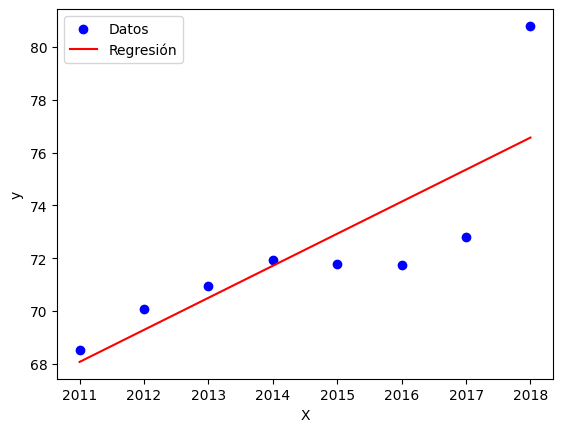

In [ ]:
plt.scatter(fixed_x[:, 1], stats_visualization['metascore'].tolist(), color='blue', label='Datos')
plt.plot(fixed_x[:, 1], fixed_x[:, 1] * coeficientes[1] + coeficientes[0], color='red', label='Regresión')

plt.xlabel('X')
plt.ylabel('y')
plt.legend()

# Mostrar el gráfico
plt.show()